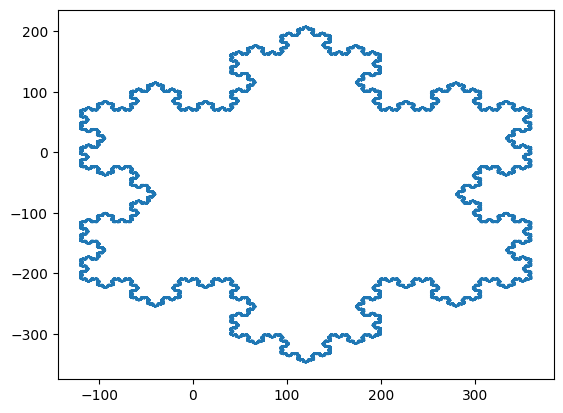

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import math as maths


def segmentLine(line):

    p1 = line[0]
    p2 = line[1]

    p1New = [(2/3)*p1[0] + (1/3)*p2[0], (2/3)*p1[1] + (1/3)*p2[1]]
    p2New = [(1/3)*p1[0] + (2/3)*p2[0], (1/3)*p1[1] + (2/3)*p2[1]]

    dist = maths.dist(p1New, p2New)

    tip = [1.5, np.sqrt(3) / 2 * 1]


    return np.array([p1,p1New,tip,p2New,p2])



def getRotation(degrees):
    theta = np.radians(degrees)
    c, s = np.cos(theta), np.sin(theta)
    R = np.array(((c, -s), (s, c)))
    return R


def rotate(p, origin=(0, 0), degrees=0):
    angle = np.radians(degrees)
    R = np.array([[np.cos(angle), -np.sin(angle)],
                  [np.sin(angle),  np.cos(angle)]])
    o = np.atleast_2d(origin)
    p = np.atleast_2d(p)
    return np.squeeze((R @ (p.T-o.T) + o.T).T)


def kochCurve(order):
    kochCurve = np.array([[0,0],[1,0],[1.5, np.sqrt(3) / 2],[2,0],[3,0]])  * 160
    
    if order == 1:
        return kochCurve
    
    reflectionMatrix = np.array([[-1, 0], [0, 1]])
    
    for i in range(0,order -1):
        baseCurve = kochCurve.copy()
        curve = baseCurve.copy()
        
        dist = maths.dist(kochCurve[0],kochCurve[-1]) 
        curve[:,0] += dist
        
        rotated = rotate(curve, curve[0],60)
        curve = np.concatenate((baseCurve, rotated))
        
        lastPoint = curve[-1]
        curve[:,0] -= lastPoint[0]
        mirrored = np.dot(curve.copy(), reflectionMatrix)
        curve[:,0] += lastPoint[0]
        
        kochCurve = np.concatenate((curve, mirrored[::-1])) / 3
        
    return kochCurve

    
def arrange(curve):
    
    reflectionMatrix = np.array([[1,0],[0,-1]])
    
    dist = maths.dist(curve[0],curve[-1]) 
    
    left = rotate(curve,degrees=60)
    right = rotate(curve,degrees=-60)
    
    right[:,0] += dist /2
    
    bottom = curve.copy()
    bottom[:,1] += dist / 2.3
    bottom[:,0] += dist / 4
    
    bottom = bottom.dot(reflectionMatrix)
    
    
    return np.concatenate((bottom[::-1],left,right))



vertices = np.array([[0,0],[9,0],[3,np.sqrt(3)/2 * 9],[0,0]])

line = np.array([[0,0],[3,0]])

sixty = getRotation(-60)
negsixty = getRotation(60)


xmirror = np.array([[1,0],[0,-1]])
ymirror = np.array([[-1,0],[0,1]])
linexy = np.array([[0,1],[1,0]])

refOrigin = np.array([[-1,0],[0,-1]])
refthroughLine = np.array([[0,-1],[-1,0]])

mirror = vertices.dot(refthroughLine)



line = kochCurve(13)

line = arrange(line)

plt.plot(line[:,0],line[:,1])



plt.show()